### importing library and creating a df

In [ ]:
# importing library
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [2]:
# importing csv file of spotify songs

df = pd.read_csv('songdf.csv')
df

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Boy's a liar Pt. 2,PinkPantheress,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013
1,Flowers,Miley Cyrus,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455
2,Kill Bill,SZA,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947
3,Escapism.,RAYE,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,Call Me Every Day (feat. Wizkid),Chris Brown,0.729,0.634,-7.194,0.1750,0.1150,0.000013,0.0997,0.772,171.862,7vVs4XCsQyGn1Au3drvo9Z,146840
2636,2 Sugar (feat. Ayra Starr),Wizkid,0.914,0.643,-3.862,0.1340,0.0498,0.000000,0.0618,0.764,105.033,1DA2ADZs6O28y2rmdmpekw,187907
2637,10 Toes (feat. Omah Lay),King Promise,0.751,0.564,-7.837,0.1640,0.1390,0.000003,0.1420,0.601,103.952,7JVUJLsVXysVpSWChbnz9I,177068
2638,Werser,Mr Eazi,0.847,0.628,-9.257,0.0564,0.0422,0.000028,0.0792,0.631,111.998,5ysRcpZAYSHvqtMNKgQQ16,248697


In [3]:
# dropping duplicate

df.drop_duplicates

<bound method DataFrame.drop_duplicates of                                                   song          artist  \
0                                   Boy's a liar Pt. 2  PinkPantheress   
1                                              Flowers     Miley Cyrus   
2                                            Kill Bill             SZA   
3                                            Escapism.            RAYE   
4               Creepin' (with The Weeknd & 21 Savage)    Metro Boomin   
...                                                ...             ...   
2635                  Call Me Every Day (feat. Wizkid)     Chris Brown   
2636                        2 Sugar (feat. Ayra Starr)          Wizkid   
2637                          10 Toes (feat. Omah Lay)    King Promise   
2638                                            Werser         Mr Eazi   
2639  Paradise II (feat. Norah Jones) - Single Version           Logic   

      danceability  energy  loudness  speechiness  acousticness  \
0

In [4]:
df.shape

(2640, 13)

In [5]:
df_num = df.select_dtypes(exclude= ['object'])
df_num

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013
1,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
2,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
3,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,272373
4,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520
...,...,...,...,...,...,...,...,...,...,...
2635,0.729,0.634,-7.194,0.1750,0.1150,0.000013,0.0997,0.772,171.862,146840
2636,0.914,0.643,-3.862,0.1340,0.0498,0.000000,0.0618,0.764,105.033,187907
2637,0.751,0.564,-7.837,0.1640,0.1390,0.000003,0.1420,0.601,103.952,177068
2638,0.847,0.628,-9.257,0.0564,0.0422,0.000028,0.0792,0.631,111.998,248697


In [7]:
df_num.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000,2640.000000
mean,0.600683,0.573375,-9.953398,0.096907,0.323971,0.135893,0.165548,0.510388,119.645885,203316.029545
std,0.169684,0.263351,7.312202,0.105401,0.345350,0.310244,0.125796,0.249336,28.773221,61403.102213
min,0.107000,0.002900,-40.436000,0.022700,0.000005,0.000000,0.010400,0.031300,48.281000,70160.000000
25%,0.479000,0.448000,-10.584000,0.036300,0.033900,0.000000,0.093400,0.304000,96.931500,159287.750000
50%,0.605000,0.624000,-7.496000,0.049400,0.171000,0.000013,0.115000,0.498000,119.660500,192854.000000
75%,0.732250,0.770250,-5.443250,0.102000,0.574250,0.005555,0.197000,0.719250,137.921000,235755.750000
max,0.975000,0.996000,0.844000,0.909000,0.996000,0.975000,0.893000,0.985000,208.571000,547107.000000


### K-Means is a distance based algorithm: we need to scale / normalize!:

In [8]:
scaler = StandardScaler()
scaler.fit(df_num)
scaled_df = scaler.transform(df_num)
scaled_df_frame = pd.DataFrame(scaled_df, columns = df_num.columns)
display(df_num.head())
print()
display(scaled_df_frame.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013
1,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
2,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
3,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,272373
4,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.561838,0.894887,0.232450,-0.445118,-0.208440,-0.437689,0.655572,1.390406,0.462883,-1.177737
1,0.626677,0.408752,0.769873,-0.285697,-0.755235,-0.438085,-1.060236,0.543998,-0.057248,-0.046603
2,0.255327,0.613840,0.575366,-0.548552,-0.787382,0.026137,-0.036158,-0.370604,-1.065981,-0.804168
3,-0.369483,0.640426,0.628985,0.162201,-0.538602,-0.437951,-0.573640,-1.044522,-0.818238,1.124863
4,0.673833,0.177078,0.540076,-0.460301,0.269426,-0.438102,-0.662690,-1.357412,-0.754173,0.296523


In [9]:
scaled_df_frame.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03,2.640000e+03
mean,1.607721e-16,3.603599e-16,2.767147e-16,1.258253e-16,-3.364312e-17,3.160603e-15,-6.432144e-17,1.884856e-16,-2.225493e-16,1.318758e-16
std,1.000189e+00,1.000189e+00,1.000189e+00,1.000189e+00,1.000189e+00,1.000189e+00,1.000189e+00,1.000189e+00,1.000189e+00,1.000189e+00
min,-2.909987e+00,-2.166626e+00,-4.169521e+00,-7.041775e-01,-9.382584e-01,-4.381016e-01,-1.233566e+00,-1.921818e+00,-2.480724e+00,-2.168966e+00
25%,-7.172551e-01,-4.761664e-01,-8.625606e-02,-5.751222e-01,-8.400924e-01,-4.381016e-01,-5.736398e-01,-8.279055e-01,-7.895775e-01,-7.171726e-01
50%,2.544433e-02,1.922697e-01,3.361317e-01,-4.508115e-01,-4.430290e-01,-4.380594e-01,-4.019000e-01,-4.969138e-02,5.080391e-04,-1.704150e-01
75%,7.755118e-01,7.477173e-01,6.169143e-01,4.832889e-02,7.248470e-01,-4.201930e-01,2.500749e-01,8.378338e-01,6.352635e-01,5.284076e-01
max,2.206387e+00,1.605101e+00,1.476907e+00,7.706244e+00,1.946302e+00,2.705179e+00,5.783911e+00,1.903867e+00,3.091137e+00,5.599979e+00


### clustering with KMeans

In [11]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(scaled_df_frame)

KMeans(n_clusters=3, random_state=1234)

In [12]:
kmeans.labels_

array([0, 0, 0, ..., 2, 0, 2], dtype=int32)

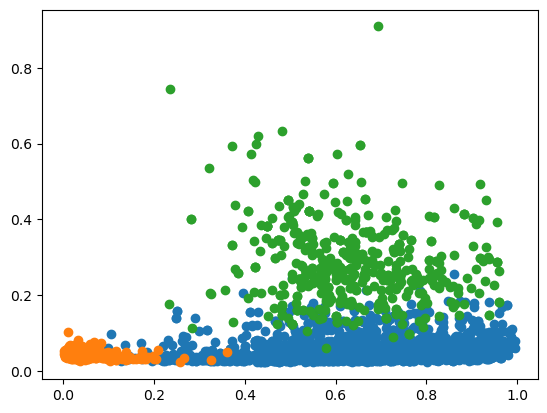

In [13]:
# assign a cluster to each example
labels = kmeans.predict(scaled_df_frame)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_num.to_numpy()[row_ix, 1], df_num.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [14]:
clusters = kmeans.predict(scaled_df_frame)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1813
1     342
2     485
dtype: int64

In [15]:
#df_num = pd.DataFrame(df_num)
df_num["cluster"] = clusters
df_num

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013,0
1,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455,0
2,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947,0
3,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,272373,0
4,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,221520,0
...,...,...,...,...,...,...,...,...,...,...,...
2635,0.729,0.634,-7.194,0.1750,0.1150,0.000013,0.0997,0.772,171.862,146840,2
2636,0.914,0.643,-3.862,0.1340,0.0498,0.000000,0.0618,0.764,105.033,187907,0
2637,0.751,0.564,-7.837,0.1640,0.1390,0.000003,0.1420,0.601,103.952,177068,2
2638,0.847,0.628,-9.257,0.0564,0.0422,0.000028,0.0792,0.631,111.998,248697,0


In [16]:
df_num[df_num['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
96,0.894,0.633,-5.294,0.298,0.0369,0.0,0.178,0.578,145.11,145655,2


In [17]:
kmeans.inertia_

15423.820097208052

### Choosing K

In [18]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(scaled_df_frame)
print(kmeans2.inertia_)

15545.893563768735


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

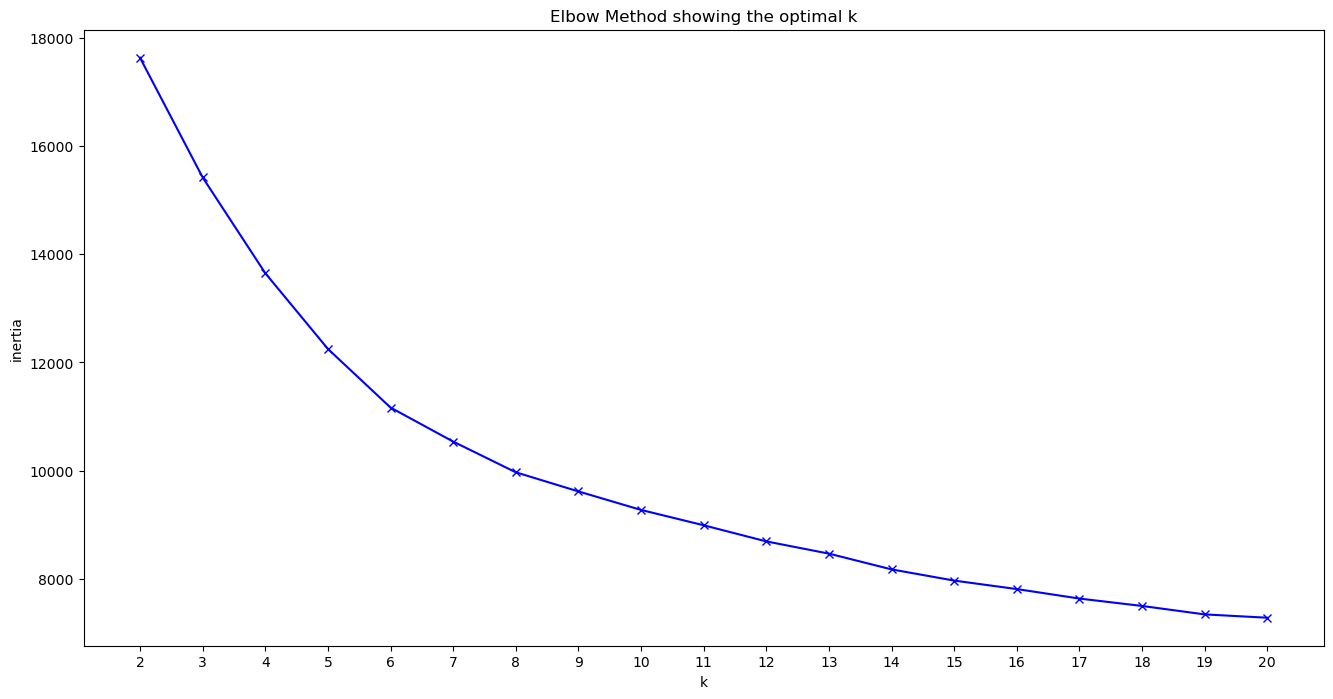

In [19]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df_frame)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

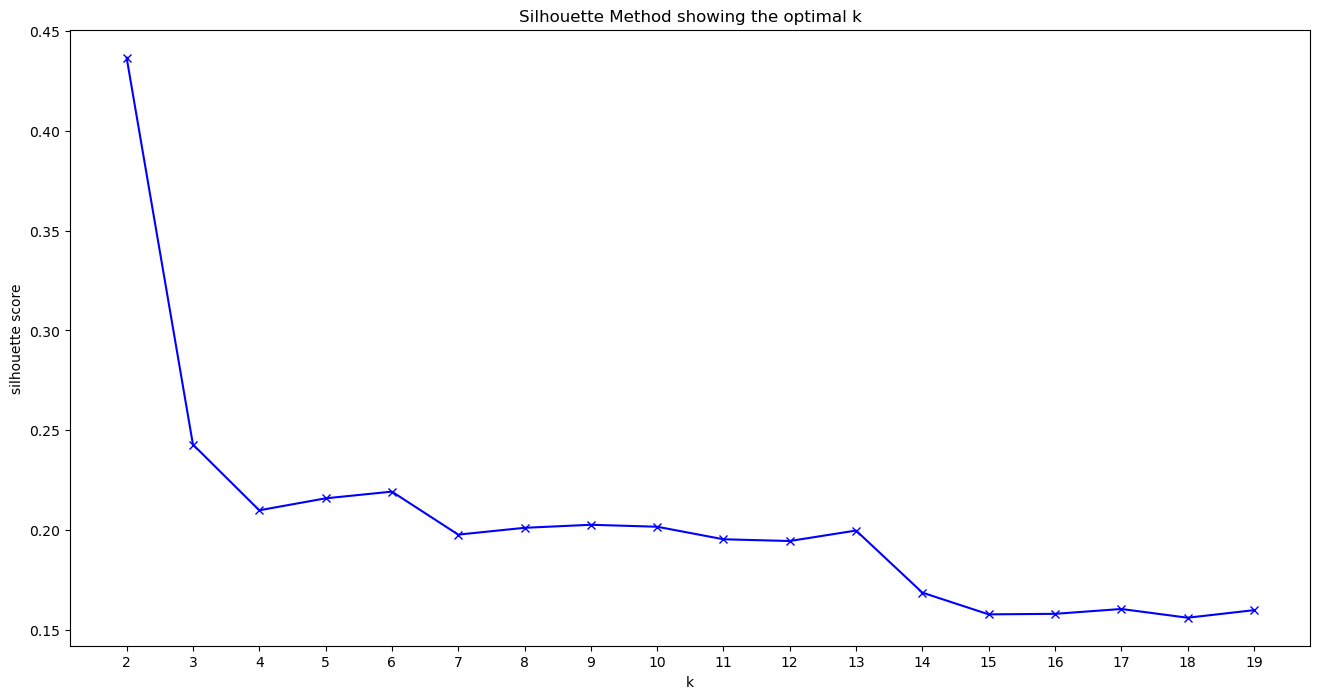

In [20]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df_frame)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(scaled_df_frame, kmeans.predict(scaled_df_frame)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

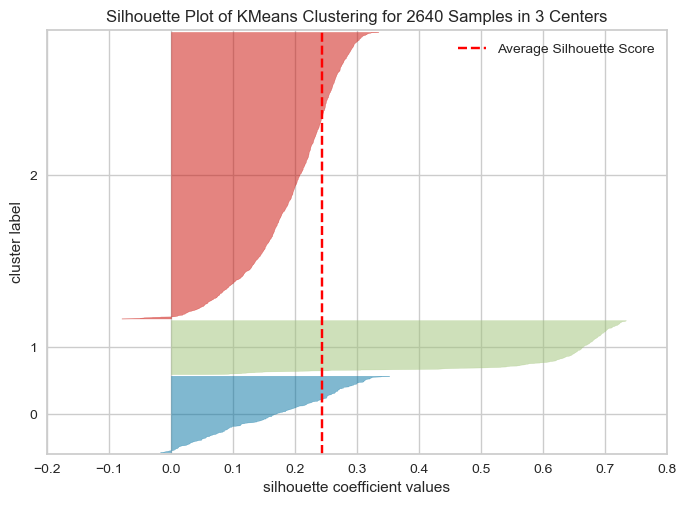

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2640 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=62)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(scaled_df_frame)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### saving with pickle

In [22]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [23]:
kmeans

KMeans(n_clusters=19, random_state=1234)

In [24]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [25]:
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [26]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song

### chosen k = 3

Training a K-Means model with 1 clusters! 

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

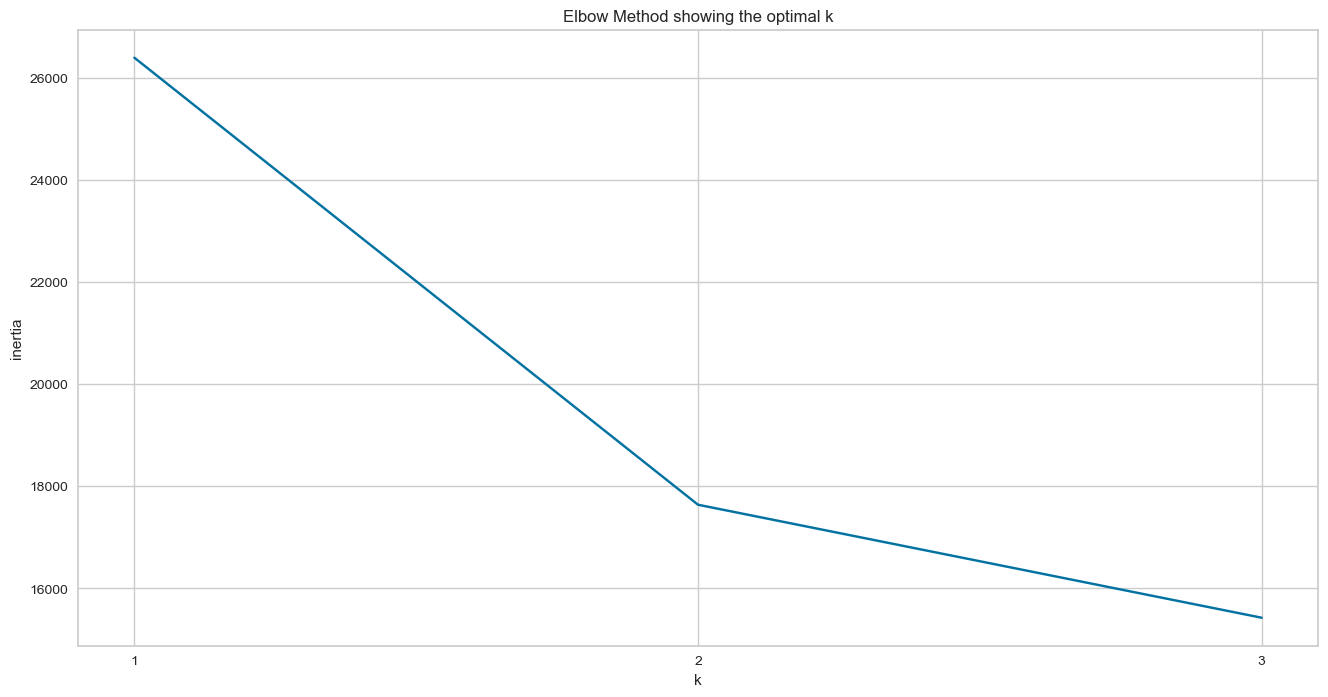

In [27]:
K = range(1, 4)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df_frame)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [28]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [36]:
scaler

StandardScaler()

In [29]:
kmeans

KMeans(n_clusters=3, random_state=1234)

In [30]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [37]:
scaler3 = load("scaler.pickle")
scaler3

StandardScaler()

In [41]:
kmeans3 = load("kmeans_4.pickle")
kmeans3

KMeans(n_clusters=3, random_state=1234)

In [ ]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song

## user fucntion

In [32]:
df1 = pd.read_csv('top100songs', sep='\t')
df1.head()

,Unnamed: 0,Song’s name,Song’s artist
0,0,Flowers,Miley Cyrus
1,1,Kill Bill,SZA
2,2,Last Night,Morgan Wallen
3,3,Unholy,Sam Smith & Kim Petras
4,4,Creepin',"Metro Boomin, The Weeknd & 21 Savage"


In [54]:
df1.drop('Unnamed: 0', axis=1, inplace=True)
df1.head()

,Song’s name,Song’s artist
0,Flowers,Miley Cyrus
1,Kill Bill,SZA
2,Last Night,Morgan Wallen
3,Unholy,Sam Smith & Kim Petras
4,Creepin',"Metro Boomin, The Weeknd & 21 Savage"


In [33]:
df.head()

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,Boy's a liar Pt. 2,PinkPantheress,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013
1,Flowers,Miley Cyrus,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455
2,Kill Bill,SZA,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947
3,Escapism.,RAYE,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520


In [34]:
df["cluster"] = clusters
df.head()

,song,artist,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,cluster
0,Boy's a liar Pt. 2,PinkPantheress,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013,0
1,Flowers,Miley Cyrus,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455,0
2,Kill Bill,SZA,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947,0
3,Escapism.,RAYE,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373,0
4,Creepin' (with The Weeknd & 21 Savage),Metro Boomin,0.715,0.620,-6.005,0.0484,0.4170,0.000000,0.0822,0.172,97.950,2dHHgzDwk4BJdRwy9uXhTO,221520,0


In [43]:
import random
import config

import spotipy
import json
from spotipy.oauth2 import SpotifyClientCredentials


#Initialize SpotiPy with user credentias
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.Client_ID,
                                                           client_secret= config.Client_Secret))

In [85]:
def user_choice(df1):
    song_list = list(df1['Song’s name'])
    song_list = [i.lower() for i in song_list]
    list2 = list(df["song"])
    while True:
        user_input = input('Enter your choice of music: ')
        if (user_input.lower() not in song_list):
            print('***************************************************************')
            print('Your choice of song is not in the top 100 hit')
            print('***************************************************************')
            return random.sample(list2, k= 1)
        else:
            choice = df1.loc[(df1["Song’s name"] == user_input.title()), ["Song’s artist"]]
            choice = choice["Song’s artist"].tolist()
            choice = [x.lower() for x in choice]
            user_input2 = input('more than 1 song has same title, Enter artist name to be specific: ')
            
            if (user_input2.lower() not in choice):
                print(f"Your song choice: '{user_input.title()}' with artist name: '{user_input2.title()}' is not in the Top 100")
                break
            else:
                top_100 = random.sample(song_list, k=1)
                while top_100 == user_input.lower():
                    top_100 = random.sample(song_list, k=1)
                
                return random.sample(song_list, k=1)

In [45]:
from IPython.display import IFrame

In [86]:
song_choice = user_choice(df1)
song_choice

Enter your choice of music: hjj
***************************************************************
Your choice of song is not in the top 100 hit
***************************************************************


['Jane Says']

In [87]:
result = sp.search(q= song_choice, limit=1)

In [ ]:
result

In [88]:
track_id = result["tracks"]["items"][0]["id"]
track_id

'7c1Dar0pIAW7w5TzaGjt9t'

In [78]:
# defining function to play mylist
def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [89]:
play_song(track_id)

In [ ]:
def son_recommender():
    

In [ ]:
for item in range(len(tracks)):
    #print (tracks[item]["track"]["id"])
    list_of_audio_features.append(sp.audio_features(tracks[item]["track"]["id"])[0])

In [ ]:
sp.audio_features(tracks[item]["track"]["id"])

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(scaled_df_frame)

In [ ]:
labels = kmeans.predict(scaled_df_frame)

In [ ]:
for artist in (initial_artists,start=1):
    data = sp.search(artist,limit=1,type='artist')['artists']['items'][0]
    id = data['id']
    name = data['name'].replace("'","")
    genres = ','.join(data['genres']).replace("'","")
    popularity = data['popularity'